# Evaluation Metrics

The RL agent will play against N-step lookahead opponent for 50 games in the first position and another 50 games in the second position, for a total of 100 games. The average score is calculated by the following formula

$\bar{r} = \frac{1}{N}\sum^{N}_{n}r_{n}, \quad r_{n} \in \{-1, 0, 1\}$

In [1]:
import os
from tqdm import tqdm
from D3QNAgent import Agent
from kaggle_environments import evaluate, make, utils
import numpy as np
from IPython.display import clear_output

nstep_lookahead_agent = './fast_Nstep_lookahead_agent.py'
random_agent = 'random'
negamax_agent = 'negamax'

def preprocess_board_state(observation):
    board = np.array(observation['board'], dtype=np.float32).reshape(6, 7)
    marker = observation.mark

    state = np.zeros((6, 7, 2), dtype=np.float32)
    
    if marker == 1:
        state[:, :, 0][board == 1] = 1
        state[:, :, 1][board == 2] = 1
        
    else:
        state[:, :, 0][board == 2] = 1
        state[:, :, 1][board == 1] = 1

    return state

Loading environment football failed: No module named 'gfootball'


In [2]:
# extract all file names in the model weights folder
names = sorted(os.listdir('./models'))

def mean_reward(rewards, position):
    return sum(r[position] for r in rewards) / float(len(rewards))

scores = []
agent_num = []
positions = []


In [3]:
for idx, model_path in enumerate(tqdm(names)):

    def my_agent(obs, config):
    # define agent
        agent = Agent(
            config, 
            input_shape=(None, 6, 7, 2),
            testing=True,
        )
        agent.load_DQN_weights(os.path.join('./models/' + model_path))

        # preprocessing of the state
        state = preprocess_board_state(obs)

        return agent.choose_action(state)

    scores.append(mean_reward(evaluate("connectx", [my_agent, nstep_lookahead_agent], num_episodes=50), 0))
    scores.append(mean_reward(evaluate("connectx", [ nstep_lookahead_agent, my_agent], num_episodes=50), 1))

    agent_num.append(idx)
    agent_num.append(idx)
    positions.append(1)
    positions.append(2)

100%|██████████| 16/16 [1:58:13<00:00, 443.32s/it] 


Text(0.5, 1.0, 'RL Agent Performance Against N-step Lookahead Opponent')

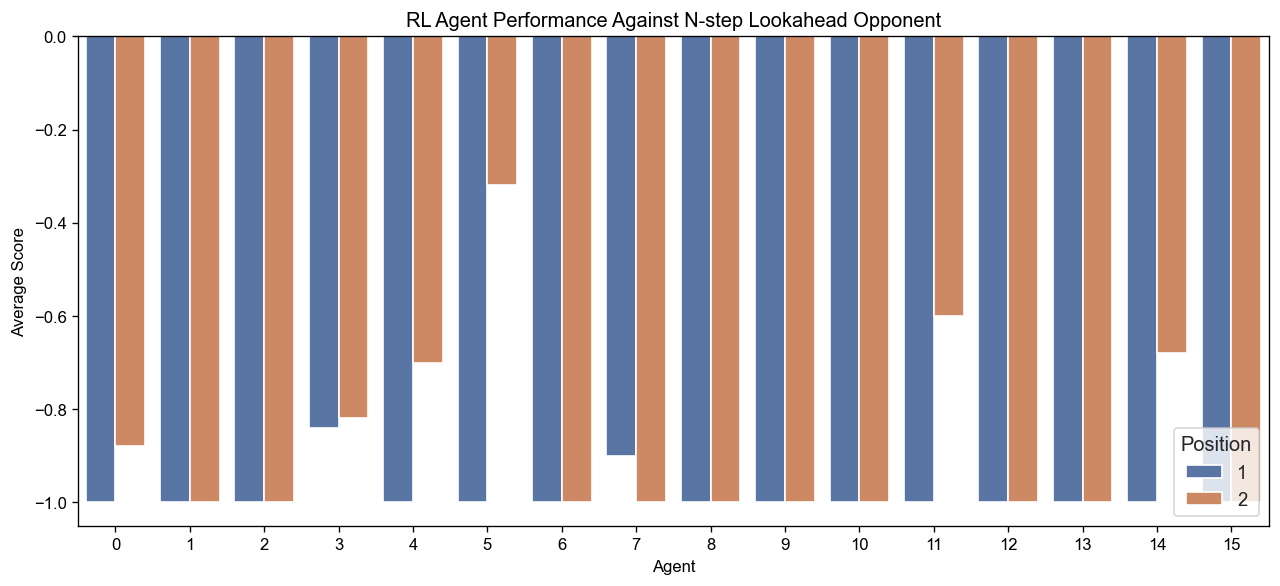

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = {
    'Score': scores,
    'Agent': agent_num,
    'Position': positions,
}

fig, ax = plt.subplots(dpi=120, figsize=(12.8, 5.4))

df = pd.DataFrame(data=d)
sns.set_theme(style='whitegrid')

ax = sns.barplot(x='Agent', y='Score', hue='Position', data=df)
ax.set_xlabel('Agent')
ax.set_ylabel('Average Score')
ax.set_title('RL Agent Performance Against N-step Lookahead Opponent')

In [5]:
# import threading

# scores = np.zeros(32)

# def evaluate_agent(idx, model_path):

#     print(threading.get_ident(), " Started to work on agent ", idx)
    
#     def my_agent(obs, config):
#     # define agent
#         agent = Agent(
#             config, 
#             input_shape=(None, 6, 7, 2),
#             testing=True,
#         )
#         agent.load_DQN_weights(os.path.join('./models/' + model_path))

#         # preprocessing of the state
#         state = preprocess_board_state(obs)

#         return agent.choose_action(state)

#     score_1 = mean_reward(evaluate("connectx", [my_agent, nstep_lookahead_agent], num_episodes=1), 0)
#     score_2 = mean_reward(evaluate("connectx", [ nstep_lookahead_agent, my_agent], num_episodes=1), 1)

#     with threading.Lock():
#         scores[idx*2] = score_1
#         scores[idx*2+1] = score_2

#     print(threading.get_ident(), " finished with agent ", idx)


# threads = []

# for idx, model_path in enumerate(names):
#     threads.append(threading.Thread(target=evaluate_agent, args=(idx, model_path)))

# for thread in threads:
#     thread.start()
# for thread in threads:
#     thread.join()